Assignment 5: 

Name: Jeffin Johny K

UID: 118293929

Please submit to ELMS
- a PDF containing all outputs (by executing **Run all**)
- your ipynb notebook containing all the code

I understand the policy on academic integraty (collaboration and the use of online material).
Please sign your name here: 

In [ ]:
# import the necessary packages
import numpy as np
import gzip, os
from urllib.request import urlretrieve
from random import random
from math import exp
from random import seed
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import cv2
from sklearn.metrics import jaccard_score

# Part 1: Backpropagation in Neural Networks (20 Points)

#### Overview
Artificial Neural Networks are computational learning systems that uses a network of functions to understand and translate a data input of one form into a desired output, usually in another form. The concept of the artificial neural network was inspired by human biology and the way neurons of the human brain function together to understand inputs from human senses.

A simple neural network consists of Input Layer, Hidden Layer and Output Layer.
To train these the network, we will use Backpropagation algorithm.  Backpropagation is the cornerstone of modern neural networks. To understand the algorithm in details, here is a mathematical description in the Chapter 2 of *How the backpropagation algorithm works from Neural Networks and Deep Learning* (http://neuralnetworksanddeeplearning.com/chap2.html).

In this part, you are required to implement the following architecture and write training code of a neural network from scratch using the numpy library alone. 

Architecture Definition :

*   An Input Layer with the following 2-dimensions:
  *  0: Batch Size
  *  1: 784 = 28*28 pixels
* A hidden layer with 500 units
* A second hidden layer with 50 units
* An output layer with 10 units

There are five major steps to the implementation:

1. Define neural network: initialize_network()

2. Forward Propagation: pre_activation(), sigmoid_activation(), forward_propagation()

3. Backpropagation: backward_propagate_error()

4. Loss function and updation of weights (SGD): update_weights()

5. Training: train()


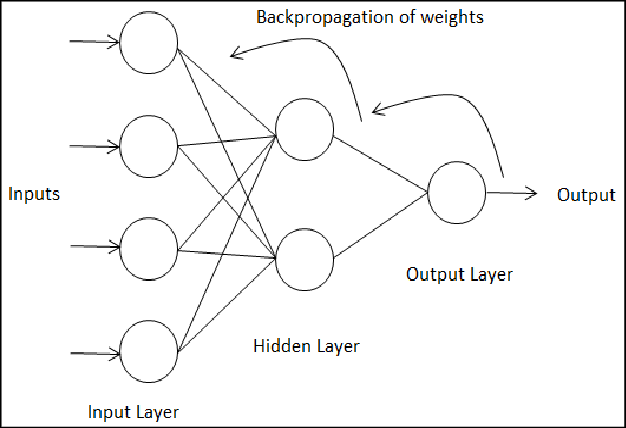



## Data

In [ ]:
# Download Data -- run this cell only one time per runtime
!gdown 11SpETIc56PReKuaUKEwWDvdkiynyyGFA
!unzip "/content/MNISTArchive.zip" -d "/content/"
!gzip -d "/content/t10k-labels-idx1-ubyte.gz"
!gzip -d "/content/t10k-images-idx3-ubyte.gz" 
!gzip -d "/content/train-labels-idx1-ubyte.gz"
!gzip -d "/content/train-images-idx3-ubyte.gz"

Downloading...
From: https://drive.google.com/uc?id=11SpETIc56PReKuaUKEwWDvdkiynyyGFA
To: /content/MNISTArchive.zip
100% 11.6M/11.6M [00:00<00:00, 149MB/s]
Archive:  /content/MNISTArchive.zip
  inflating: /content/t10k-labels-idx1-ubyte.gz  
  inflating: /content/__MACOSX/._t10k-labels-idx1-ubyte.gz  
  inflating: /content/t10k-images-idx3-ubyte.gz  
  inflating: /content/__MACOSX/._t10k-images-idx3-ubyte.gz  
  inflating: /content/train-labels-idx1-ubyte.gz  
  inflating: /content/__MACOSX/._train-labels-idx1-ubyte.gz  
  inflating: /content/train-images-idx3-ubyte.gz  
  inflating: /content/__MACOSX/._train-images-idx3-ubyte.gz  


## Helper Functions:

### Code (10 pts)

In [ ]:
def read_mnist(path=None):
    r"""Return (train_images, train_labels, test_images, test_labels).

    Args:
        path (str): Directory containing MNIST. Default is
            /home/USER/data/mnist or C:\Users\USER\data\mnist.
            Create if nonexistant. Download any missing files.

    Returns:
        Tuple of (train_images, train_labels, test_images, test_labels), each
            a matrix. Rows are examples. Columns of images are pixel values.
            Columns of labels are a onehot encoding of the correct class.
    """
    url = 'http://yann.lecun.com/exdb/mnist/'
    files = ['train-images-idx3-ubyte.gz',
             'train-labels-idx1-ubyte.gz',
             't10k-images-idx3-ubyte.gz',
             't10k-labels-idx1-ubyte.gz']

    if path is None:
        # Set path to /home/USER/data/mnist or C:\Users\USER\data\mnist
        path = os.path.join(os.path.expanduser('~'), 'data', 'mnist')

    # Create path if it doesn't exist
    os.makedirs(path, exist_ok=True)

    # Download any missing files
    for file in files:
        if file not in os.listdir(path):
            urlretrieve(url + file, os.path.join(path, file))
            print("Downloaded %s to %s" % (file, path))

    def _images(path):
        """Return images loaded locally."""
        with gzip.open(path) as f:
            # First 16 bytes are magic_number, n_imgs, n_rows, n_cols
            pixels = np.frombuffer(f.read(), 'B', offset=16)
        return pixels.reshape(-1, 784).astype('float32') / 255

    def _labels(path):
        """Return labels loaded locally."""
        with gzip.open(path) as f:
            # First 8 bytes are magic_number, n_labels
            integer_labels = np.frombuffer(f.read(), 'B', offset=8)

        def _onehot(integer_labels):
            """Return matrix whose rows are onehot encodings of integers."""
            n_rows = len(integer_labels)
            n_cols = integer_labels.max() + 1
            onehot = np.zeros((n_rows, n_cols), dtype='uint8')
            onehot[np.arange(n_rows), integer_labels] = 1
            return onehot

        return _onehot(integer_labels)

    train_images = _images(os.path.join(path, files[0]))
    train_labels = _labels(os.path.join(path, files[1]))
    test_images = _images(os.path.join(path, files[2]))
    test_labels = _labels(os.path.join(path, files[3]))

    return train_images, train_labels, test_images, test_labels

In [ ]:
# Initialize a network # 784 , #500 , #50 , #10
def initialize_network(n_inputs, n_h1 , n_h2 , n_outputs):
	network = {}

	W1 =  np.sqrt(1. / n_inputs)*np.random.randn(n_inputs , n_h1)
	b1 = np.zeros(n_h1)
 
	W2 =  np.sqrt(1. / n_h1)*np.random.randn( n_h1 , n_h2)
	b2 = np.zeros(n_h2)
 
	W3 =  np.sqrt(1. / n_h2)*np.random.randn( n_h2 , n_outputs)
	b3 = np.zeros(n_outputs)
 
	network['W1'] = W1
	network['b1'] = b1

	network['W2'] = W2
	network['b2'] = b2

	network['W3'] = W3
	network['b3'] = b3
	print(f" W1 shape {W1.shape}")
	print(f" b1 shape {b1.shape}")
	print(f" W2 shape {W2.shape}")
	print(f" b2 shape {b2.shape}")
	print(f" W3 shape {W3.shape}")
	print(f" b3 shape {b3.shape}")

	return network

In [ ]:
# Calculate neuron activation for an input
def pre_activation(x, w, b):
  # Computes Wx + b
    x_product_w = np.matmul(x,w)
    out = x_product_w + b
    return out

def sigmoid_activation(out):
	out_sigmoid = 1/(1+np.exp(-out))
	return out_sigmoid


def sigmoid_derivative(output):
	out_sigmoid_deriv = sigmoid_activation(output)*(1-sigmoid_activation(output))
	return out_sigmoid_deriv

def softmax(z):
  s = np.exp(z) / np.sum(np.exp(z), axis =1 , keepdims=True)
  return s

def loss(X , Y):
  L_sum = np.sum(np.multiply( X , np.log(Y) ))
  m = X.shape[0]
  L = -(1/m)*L_sum
  return L


In [ ]:
# Forward Propagation:
def forward_propagation(network, X):
	inputs = X
	cache = {}

	cache['Z1'] = pre_activation(inputs , network['W1'] , network['b1'])
	cache['A1'] = sigmoid_activation(cache['Z1'])
	cache['Z2'] = pre_activation(cache['A1'] , network['W2'] , network['b2'])
	cache['A2'] = sigmoid_activation(cache['Z2'])
	cache['Z3'] = pre_activation(cache['A2'] , network['W3'] , network['b3'])
	cache['A3'] = softmax(cache['Z3'])

	return cache

# Backpropagation:
def backward_propagate(X , Y , batch_size , network , cache):
	gradient = {}
	dZ3 = cache['A3'] -Y
	dW3 = (1/batch_size) * (cache['A2'].T@dZ3)
	db3 = (1/batch_size) * np.sum(dZ3 , axis = 0)

	dA2 = dZ3@(network['W3'].T)
	dZ2 = dA2 * sigmoid_derivative(cache['Z2'])
	dW2 = (1/batch_size) * (cache['A1'].T@dZ2)
	db2 = (1/batch_size) * np.sum(dZ2 , axis = 0)

	dA1 = dZ2@(network['W2']).T
	dZ1 = dA1 * sigmoid_derivative(cache['Z1'])
	dW1 = (1/batch_size) * (X.T@dZ1)
	db1 = (1/batch_size) * np.sum(dZ1 , axis = 0)

	gradient['dW1'] = dW1
	gradient['db1'] = db1
	gradient['dW2'] = dW2
	gradient['db2'] = db2
	gradient['dW3'] = dW3
	gradient['db3'] = db3

	return gradient

	 
# Train a network for a fixed number of epochs
def train(network, train, loss_track , l_rate, n_epoch, batch_size , n_outputs ):

	batches = (train.shape[0] // batch_size)

	# training the model
	for i in range(n_epoch):
		permutation = np.random.permutation(train.shape[0])
		X_train_shuffled = train[permutation , :]
		Y_train_shuffled = n_outputs[ permutation , :]

		for j in range(batches):

			begin = j * batch_size
			end = min(begin + batch_size, train.shape[0] - 1)
			X = X_train_shuffled[ begin:end , :]
			Y = Y_train_shuffled[ begin:end , :]
			m_batch = end - begin

			cache = forward_propagation( network , X)
			gradient = backward_propagate(X, Y, m_batch , network, cache)

			network["W1"] = network["W1"] - l_rate * gradient["dW1"]
			network["b1"] = network["b1"] - l_rate * gradient["db1"]
			network["W2"] = network["W2"] - l_rate * gradient["dW2"]
			network["b2"] = network["b2"] - l_rate * gradient["db2"]
			network["W3"] = network["W3"] - l_rate * gradient["dW3"]
			network["b3"] = network["b3"] - l_rate * gradient["db3"]

		cache = forward_propagation( network , train)
		train_cost = loss(n_outputs, cache["A3"])
		print(f" loss at epoch {i+1} =  {train_cost}")
		loss_track.append(train_cost)
	
	return network , loss_track
    
	

In [ ]:
# 1. Test your code for backprop algorithm on this sample dataset.
seed(1)
sample_dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]

n_inputs = len(sample_dataset[0]) - 1
n_outputs = len(set([sample[-1] for sample in sample_dataset]))

print(f" input shape {n_inputs}")
print(f" output shape {n_outputs}")


sample_array = np.array(sample_dataset)

network = initialize_network(n_inputs , 500 , 50, n_outputs)
loss_per_epoch = []
l_rate = 0.5
n_epoch = 1
batch_size = 2
model_trained , losses = train(network, sample_array[:,:2] , loss_per_epoch , l_rate, n_epoch, batch_size , sample_array[:,-1].reshape(-1,1) )

 input shape 2
 output shape 2
 W1 shape (2, 500)
 b1 shape (500,)
 W2 shape (500, 50)
 b2 shape (50,)
 W3 shape (50, 2)
 b3 shape (2,)
 loss at epoch 1 =  0.693997791178482


Downloaded train-images-idx3-ubyte.gz to /content/
Downloaded train-labels-idx1-ubyte.gz to /content/
Downloaded t10k-images-idx3-ubyte.gz to /content/
Downloaded t10k-labels-idx1-ubyte.gz to /content/
(60000, 784) (60000, 10)
(10000, 784) (10000, 10)
 W1 shape (784, 500)
 b1 shape (500,)
 W2 shape (500, 50)
 b2 shape (50,)
 W3 shape (50, 10)
 b3 shape (10,)
 The model has learning rate : 0.5 , epochs = 20 , batch size : 64

 Hidden layer 1 neuron count : 500 , Hidden layer 2 : 50
 loss at epoch 1 =  0.332463739750351
 loss at epoch 2 =  0.22964641793228321
 loss at epoch 3 =  0.1974264693407378
 loss at epoch 4 =  0.1577430547332392
 loss at epoch 5 =  0.13128059505562129
 loss at epoch 6 =  0.11878407965787062
 loss at epoch 7 =  0.10032475065802672
 loss at epoch 8 =  0.09131027853571735
 loss at epoch 9 =  0.08159333073791819
 loss at epoch 10 =  0.07398919618497832
 loss at epoch 11 =  0.06126368010197281
 loss at epoch 12 =  0.05333644555854365
 loss at epoch 13 =  0.049287239440

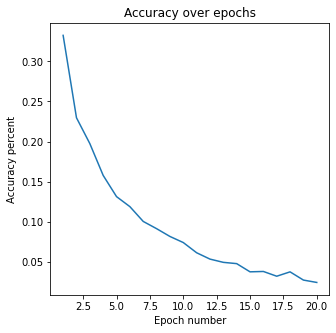

In [ ]:
# 2. Read MNIST data and test above algorithm on it.

# Read MNIST data
train_images, train_labels, test_images, test_labels = read_mnist(path='/content/')
print(train_images.shape, train_labels.shape)

print(test_images.shape, test_labels.shape)

# Run Backpropagation.
n_inp = train_images.shape[1]
n_out = train_labels.shape[1]
network = initialize_network(n_inp , 500 , 50, n_out)
loss_per_epoch = []
l_rate = 0.5
n_epoch = 20
batch_size = 64
print(f" The model has learning rate : {l_rate} , epochs = {n_epoch} , batch size : {batch_size}")
print(f"\n Hidden layer 1 neuron count : {500} , Hidden layer 2 : {50}")
model_trained , losses = train(network, train_images , loss_per_epoch , l_rate, n_epoch, batch_size , train_labels )

# Train accuracy
cache_train = forward_propagation(model_trained , train_images)
predictions_train = np.argmax(cache_train["A3"], axis=1)
sum_train = 0
for y , predict in zip(train_labels , predictions_train):
  if np.argmax(y)==predict:
    sum_train += 1
print(f" train accuracy {sum_train/len(train_images)}")

#Test accuracy
cache = forward_propagation(model_trained , test_images)
predictions = np.argmax(cache["A3"], axis=1)
sum = 0
for y , predict in zip(test_labels , predictions):
  if np.argmax(y)==predict:
    sum += 1
print(f" test accuracy {sum/len(test_images)}")


xx = np.arange(1,n_epoch+1)
plt.figure(figsize = (5, 5))
plt.title('Accuracy over epochs') 
plt.plot(xx , losses)
plt.ylabel('Accuracy percent')
plt.xlabel('Epoch number')
plt.show()



### Write-up (10 pts)

1. You are required to report a) train error w.r.t epoch, b) train and test accuracy numbers on MNIST dataset at the end of training.
2. Experiment with different number of a) hidden layers b) training epochs and report the ablation study.

### Answer:
1. a) For the network with 500 neurons in first hidden layer and 50 neurons in second hidden layer. With learning rate=0.5 , batch_size=64 and epoochs =20.Is printed and plotted above.
 
 b) The train accuracy =99.42 . And Test accuracy =97.99

2. 


a) When the hidden layers wew halved, H1 = 250 neurons and H2 = 25 neurons with same number of epochs. The train accuracy increased slightly to 99.89% and test accuracy to 98.03%.

b) For the given architecture, (H1 = 500 and H2 = 50). Increasing the epochs to 30 and learning rate to 1.5. Improved the accuracy, training = 99.9% and test = 98.12%. 

Only very slight changes in accuracy can be observed while changing the hyperparameters. As the dataset is simple, it can be inferred that a simple Neural network is sufficient to get accuracy over 97% on test data.

In [ ]:
network = initialize_network(n_inp , 250 , 25, n_out)
loss_per_epoch = []
l_rate = 0.7
n_epoch = 20
batch_size = 64
print(f" The model has learning rate : {l_rate} , epochs = {n_epoch} , batch size : {batch_size}")
print(f"\n Hidden layer 1 neuron count : {250} , Hidden layer 2 : {25}")
model_trained , losses = train(network, train_images , loss_per_epoch , l_rate, n_epoch, batch_size , train_labels )
# Train accuracy
cache_train = forward_propagation(model_trained , train_images)
predictions_train = np.argmax(cache_train["A3"], axis=1)
sum_train = 0
for y , predict in zip(train_labels , predictions_train):
  if np.argmax(y)==predict:
    sum_train += 1
print(f" train accuracy {sum_train/len(train_images)}")

#Test accuracy
cache = forward_propagation(model_trained , test_images)
predictions = np.argmax(cache["A3"], axis=1)
sum = 0
for y , predict in zip(test_labels , predictions):
  if np.argmax(y)==predict:
    sum += 1
print(f" test accuracy {sum/len(test_images)}")

 W1 shape (784, 250)
 b1 shape (250,)
 W2 shape (250, 25)
 b2 shape (25,)
 W3 shape (25, 10)
 b3 shape (10,)
 The model has learning rate : 0.7 , epochs = 20 , batch size : 64

 Hidden layer 1 neuron count : 250 , Hidden layer 2 : 25
 loss at epoch 1 =  0.30197656520284766
 loss at epoch 2 =  0.18192893700992607
 loss at epoch 3 =  0.13798617454991816
 loss at epoch 4 =  0.11033458253412672
 loss at epoch 5 =  0.08701639748283833
 loss at epoch 6 =  0.0709187799567945
 loss at epoch 7 =  0.06406132283593804
 loss at epoch 8 =  0.055453324912155676
 loss at epoch 9 =  0.04308471582853733
 loss at epoch 10 =  0.03744916834855804
 loss at epoch 11 =  0.03595808097533941
 loss at epoch 12 =  0.031929039161624144
 loss at epoch 13 =  0.028485889820382224
 loss at epoch 14 =  0.022320020719147307
 loss at epoch 15 =  0.02103762036140066
 loss at epoch 16 =  0.016916939802235686
 loss at epoch 17 =  0.015195714820903232
 loss at epoch 18 =  0.013097204116455347
 loss at epoch 19 =  0.01105476

In [ ]:
network = initialize_network(n_inp , 500 , 50, n_out)
loss_per_epoch = []
l_rate = 1.5
n_epoch = 30
batch_size = 128
print(f" The model has learning rate : {l_rate} , epochs = {n_epoch} , batch size : {batch_size}")
print(f"\n Hidden layer 1 neuron count : {500} , Hidden layer 2 : {50}")
model_trained , losses = train(network, train_images , loss_per_epoch , l_rate, n_epoch, batch_size , train_labels )
# Train accuracy
cache_train = forward_propagation(model_trained , train_images)
predictions_train = np.argmax(cache_train["A3"], axis=1)
sum_train = 0
for y , predict in zip(train_labels , predictions_train):
  if np.argmax(y)==predict:
    sum_train += 1
print(f" train accuracy {sum_train/len(train_images)}")

#Test accuracy
cache = forward_propagation(model_trained , test_images)
predictions = np.argmax(cache["A3"], axis=1)
sum = 0
for y , predict in zip(test_labels , predictions):
  if np.argmax(y)==predict:
    sum += 1
print(f" test accuracy {sum/len(test_images)}")

 W1 shape (784, 500)
 b1 shape (500,)
 W2 shape (500, 50)
 b2 shape (50,)
 W3 shape (50, 10)
 b3 shape (10,)
 The model has learning rate : 1.5 , epochs = 30 , batch size : 128

 Hidden layer 1 neuron count : 500 , Hidden layer 2 : 50
 loss at epoch 1 =  0.29411186365099595
 loss at epoch 2 =  0.20720528820553988
 loss at epoch 3 =  0.15004370321634666
 loss at epoch 4 =  0.12564047219782193
 loss at epoch 5 =  0.09102396211423854
 loss at epoch 6 =  0.08653453988958655
 loss at epoch 7 =  0.07596205627680169
 loss at epoch 8 =  0.05568554610919689
 loss at epoch 9 =  0.05760769851215706
 loss at epoch 10 =  0.04239441320063571
 loss at epoch 11 =  0.03722128220955504
 loss at epoch 12 =  0.033944608755961794
 loss at epoch 13 =  0.03249599794943056
 loss at epoch 14 =  0.022052833362044097
 loss at epoch 15 =  0.019423426024706633
 loss at epoch 16 =  0.02350642588199428
 loss at epoch 17 =  0.01603178434979032
 loss at epoch 18 =  0.011814272819938819
 loss at epoch 19 =  0.009898671

# Part 2: Training an Image Classifier




##Overview
CIFAR10 dataset will be used to train an image classifier.

![](https://miro.medium.com/max/578/1*BCsHErqOJxmKDLQXYJR_ow.png)



##Data
Using `torchvision`, it’s extremely easy to load `CIFAR10`.

In [ ]:
## The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1].
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


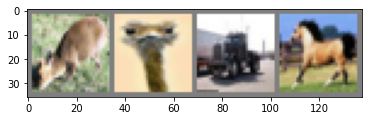

deer  bird  truck horse


In [ ]:
## Let us show some of the training images, for fun.

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

##Code (20 pts)

###Define a Convolutional Neural Network (10 pt)

Create a neural network that take 3-channel images. It should go as Conv2d --> ReLU --> MaxPool2d --> Conv2d --> ReLU --> MaxPool2d --> Flatten --> Linear --> ReLU --> Linear --> ReLU --> Linear

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net ,self).__init__()
        self.conv1 = nn.Conv2d(3 , 7 ,3)  # 7 *30*30
        self.pool1 = nn.MaxPool2d(2,2)     # 7*15*15
        self.conv2 = nn.Conv2d(7,17,7)    # 17*9*9
        self.pool2 = nn.MaxPool2d(3,3)    # 17*3*3
        self.fc1 = nn.Linear(17*3*3,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84 , 10)
 

    def forward(self, x):

        # 3*32*32
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(-1 , 17*3*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

#Initialise the model
net = Net()

###Define a Loss function and optimizer (5 pt)

Let’s use a Classification Cross-Entropy loss and SGD with momentum. (Feel free to experiment with other loss functions and optimizers to observe differences)

In [ ]:
L_rate = 3e-4

criterion = nn.CrossEntropyLoss() ##  loss function
optimizer = torch.optim.Adam(net.parameters() , lr = L_rate) ## Add optimizer

###Train the network (5 pts)

This is when things start to get interesting. We simply have to loop over our data iterator, and feed the inputs to the network and optimize.

In [ ]:
epochs = 11 ##  number of epochs to train
loss_track = []
accuracy_track = []
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    loss_epoch = 0.0
    total_correct = 0.0
    item_count = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data


        # TODO: add line to zero the parameter gradients below
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        loss_epoch += loss.item()

        total_correct += outputs.argmax(dim=1).eq(labels).sum().item()

        item_count += inputs.shape[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    loss_track.append(loss_epoch)
    accuracy_epoch = (total_correct/item_count)*100
    accuracy_track.append(accuracy_epoch)
print('Finished Training')

## Let’s quickly save our trained model:

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

[1,  2000] loss: 1.929
[1,  4000] loss: 1.686
[1,  6000] loss: 1.583
[1,  8000] loss: 1.531
[1, 10000] loss: 1.470
[1, 12000] loss: 1.432
[2,  2000] loss: 1.372
[2,  4000] loss: 1.359
[2,  6000] loss: 1.322
[2,  8000] loss: 1.297
[2, 10000] loss: 1.319
[2, 12000] loss: 1.286
[3,  2000] loss: 1.228
[3,  4000] loss: 1.237
[3,  6000] loss: 1.209
[3,  8000] loss: 1.187
[3, 10000] loss: 1.203
[3, 12000] loss: 1.187
[4,  2000] loss: 1.143
[4,  4000] loss: 1.152
[4,  6000] loss: 1.126
[4,  8000] loss: 1.134
[4, 10000] loss: 1.105
[4, 12000] loss: 1.120
[5,  2000] loss: 1.082
[5,  4000] loss: 1.102
[5,  6000] loss: 1.078
[5,  8000] loss: 1.051
[5, 10000] loss: 1.046
[5, 12000] loss: 1.080
[6,  2000] loss: 1.019
[6,  4000] loss: 1.010
[6,  6000] loss: 1.027
[6,  8000] loss: 1.036
[6, 10000] loss: 1.021
[6, 12000] loss: 1.018
[7,  2000] loss: 0.962
[7,  4000] loss: 0.995
[7,  6000] loss: 0.976
[7,  8000] loss: 0.970
[7, 10000] loss: 0.987
[7, 12000] loss: 0.978
[8,  2000] loss: 0.941
[8,  4000] 

###Test the network on the test data
We have trained the network over the training dataset. But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    test_pred = torch.tensor([])
    for data in testloader:
        images, labels = data
        outputs = net(images)

        test_pred = torch.cat((test_pred , outputs) , dim=0)

        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 71.2 %
Accuracy for class: car   is 74.2 %
Accuracy for class: bird  is 55.6 %
Accuracy for class: cat   is 52.3 %
Accuracy for class: deer  is 54.9 %
Accuracy for class: dog   is 48.7 %
Accuracy for class: frog  is 73.5 %
Accuracy for class: horse is 69.9 %
Accuracy for class: ship  is 72.4 %
Accuracy for class: truck is 74.2 %


## Write-up (5 pt)
(1 pt) Show plot for loss over epochs.

(1 pt) Show plot for accuracy over epochs.

(3 pt) Show confusion matrix on test data.

#### Plots
1) Loss over epochs

<Figure size 432x288 with 0 Axes>

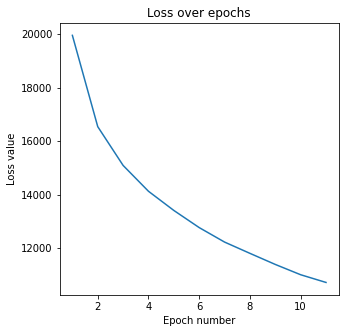

In [ ]:
plt.figure()
plt.figure(figsize = (5, 5))
plt.title('Loss over epochs') 
x_index = np.arange(1,epochs+1)
plt.plot(x_index , loss_track)
plt.ylabel('Loss value')
plt.xlabel('Epoch number')
plt.show()

2) Accuracy over epochs

<Figure size 432x288 with 0 Axes>

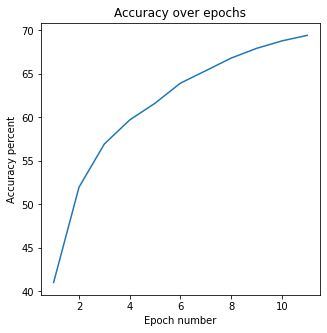

In [ ]:
plt.figure()
plt.figure(figsize = (5, 5))
plt.title('Accuracy over epochs') 
x_index = np.arange(1,epochs+1)
plt.plot(x_index , accuracy_track)
plt.ylabel('Accuracy percent')
plt.xlabel('Epoch number')
plt.show()

3) Confusion Matrix

In [ ]:
cm = confusion_matrix(testset.targets , test_pred.argmax(dim=1))

print(f"Confusion matrix : \n {cm}")

Confusion matrix : 
 [[712  14  78  22  14   4  10  15  72  59]
 [ 21 742  12  21   2   5  10   8  42 137]
 [ 63   7 556  97  87  53  73  43  11  10]
 [ 21  11  96 523  62 147  58  49   8  25]
 [ 24   4 124  75 549  44  72  90  14   4]
 [ 10   3  95 260  48 487  30  55   7   5]
 [  8   4  52 106  52  17 735  10   4  12]
 [ 15   3  58  68  57  69  13 699   2  16]
 [109  38  19  41  11  12   8   4 724  34]
 [ 44  74  15  34   2  11  18  31  29 742]]


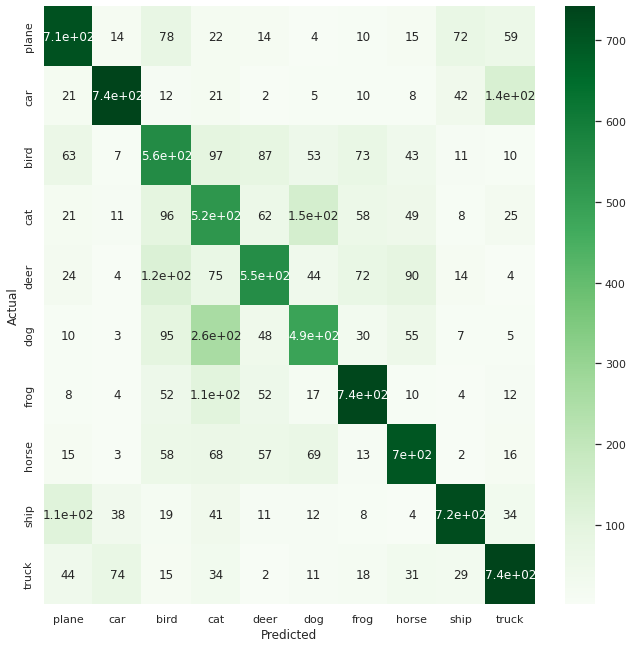

In [ ]:

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

plt.figure(figsize = (11,11))

y_labels = ['plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']

sn.heatmap(cm , cmap='Greens' , annot=True , xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')

sn.set(font_scale=1.0)#for label size


## Write-up (5 pt)
(1 pt) Show plot for loss over epochs.

(1 pt) Show plot for accuracy over epochs.

(3 pt) Show confusion matrix on test data.

## Extra Credits (5 pt)
Run VGG with pre-trained weights in this [colab](https://colab.research.google.com/github/pytorch/pytorch.github.io/blob/master/assets/hub/pytorch_vision_vgg.ipynb#scrollTo=daily-wayne). Test any two images of your choice to your model and to VGG model and show accuracy (images must include objects from CIFAR10 classes). Discuss which model performs better and why.

# Part 3: Semantic Segmentation

## Overview
Semantic Segmentation is an image analysis task in which we classify each pixel in the image into a class.
So, let's say we have the following image.

![](https://lh3.googleusercontent.com/-ELUnFgFJqUU/XPPXOOmhfMI/AAAAAAAAAP0/2cabsTI9uGUYxM3O3w4EOxjR_iJvEQAvACK8BGAs/s374/index3.png)

And then given the above image its semantically segmentated image would be the following

![](https://lh3.googleusercontent.com/-gdUavPeOxdg/XPPXQngAnvI/AAAAAAAAAQA/yoksBterCGQGt-lv3aX4kfyMUDXTar7yACK8BGAs/s374/index4.png)

As you can see, that each pixel in the image is classified to its respective class.


## Data

**WARNING: Colab deletes all files everytime runtime is disconnected. Make sure to re-download the inputs when it happens.**

In [ ]:
import os 
import tarfile
import shutil
import urllib.request

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

url='http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar'
path='VOC'
def get_archive(path,url):
  try:
    os.mkdir(path)
  except:
    path=path
  
  filename='devkit'
  urllib.request.urlretrieve(url,f"{path}/{filename}.tar")
 
get_archive(path,url)
def extract(path):
  tar_file=tarfile.open(f"{path}/devkit.tar")
  tar_file.extractall('./')
  tar_file.close()
  shutil.rmtree(path)

extract(path)

## Helper Functions

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import models
import torchvision.transforms as T
import numpy as np

"""Various RGB palettes for coloring segmentation labels."""
VOC_CLASSES = [
    "background",
    "aeroplane",
    "bicycle",
    "bird",
    "boat",
    "bottle",
    "bus",
    "car",
    "cat",
    "chair",
    "cow",
    "diningtable",
    "dog",
    "horse",
    "motorbike",
    "person",
    "potted plant",
    "sheep",
    "sofa",
    "train",
    "tv/monitor",
]


VOC_COLORMAP = [
    [0, 0, 0],
    [128, 0, 0],
    [0, 128, 0],
    [128, 128, 0],
    [0, 0, 128],
    [128, 0, 128],
    [0, 128, 128],
    [128, 128, 128],
    [64, 0, 0],
    [192, 0, 0],
    [64, 128, 0],
    [192, 128, 0],
    [64, 0, 128],
    [192, 0, 128],
    [64, 128, 128],
    [192, 128, 128],
    [0, 64, 0],
    [128, 64, 0],
    [0, 192, 0],
    [128, 192, 0],
    [0, 64, 128],
]

## Code (25 pt)

### 1. Implement Data Loader for training and validation (5 pt)

In [ ]:
import os 
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

# You can modify this class 
class VocDataset(Dataset):
  def __init__(self, dir, color_map):
    self.root=os.path.join(dir,'VOCdevkit/VOC2007')
    self.target_dir=os.path.join(self.root,'SegmentationClass')
    self.images_dir=os.path.join(self.root,'JPEGImages')
    file_list = os.path.join(self.root,'ImageSets/Segmentation/trainval.txt')
    self.files = [line.rstrip() for line in tuple(open(file_list, "r"))]
    self.color_map=color_map

  def convert_to_segmentation_mask(self,mask):
    # This function converts color channels of semgentation masks to number of classes
    # Semantic Segmentation requires a segmentation mask to be a NumPy array with the shape
    # This part is implemented for displaying colorized results in subpart 3
    # YOUR CODE HERE:
    height, width = mask.shape[:2]
    segmentation_mask = np.zeros((height, width, len(self.color_map)), dtype=np.float32)
    for label_index, label in enumerate(self.color_map):
          segmentation_mask[:, :, label_index] = np.all(mask == label, axis=-1).astype(float)
    return segmentation_mask

  def __getitem__(self,index):
    # Resizing all the images to 265X256 shape
    image_id=self.files[index]
    image_path=os.path.join(self.images_dir,f"{image_id}.jpg")
    label_path=os.path.join(self.target_dir,f"{image_id}.png")
    image=cv2.imread(image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(256,256))
    image=torch.tensor(image).float()
    label=cv2.imread(label_path)
    label=cv2.cvtColor(label,cv2.COLOR_BGR2RGB)
    label=cv2.resize(label,(256,256))
    label = self.convert_to_segmentation_mask(label)
    label=torch.tensor(label).float()
    
    return image,label

  def __len__(self):
    return len(self.files)



In [ ]:
def display_rgb(image,colors,nc=21):
  # Converting the 21 maps into RGB image for display
  max_arg = np.argmax(image , axis=0 )

  output = np.zeros( (max_arg.shape[0] , max_arg.shape[1] , 3 ) ).astype(np.uint8)

  for i in range(max_arg.shape[0]):
    for j in range(max_arg.shape[1]):
      label = max_arg[i , j]

      output[i,j,0] = colors[label , 0]
      output[i,j,1] = colors[label , 1]
      output[i,j,2] = colors[label , 2]

  return output

In [ ]:
data=VocDataset('/content',VOC_COLORMAP)
# Lenght of the dataset
data.__len__()

422

In [ ]:
# Splitting into train(80% of dataset) and validation(20% of dataset)
train_set,val_set=torch.utils.data.random_split(data,[int(len(data)*0.8),round(len(data)*0.2)+1])
train_loader=DataLoader(train_set,batch_size=10,shuffle=True)
val_loader=DataLoader(val_set,batch_size=10,shuffle=False)

###2. Define model and training code (15 pt)
Implement FCN-32 model. You can use encoder as pretrained model provided by torchvision.       

In [ ]:
import torch
class FCN32(torch.nn.Module):
  def __init__(self, n_classes, pretrained_model):
    super(FCN32, self).__init__()

    # encoder
    # Getting the pretrained features
    self.encoder = torch.nn.Sequential(*list(pretrained_model.features.children()))

    self.encoder_classifier = torch.nn.Sequential(
        torch.nn.Conv2d(512, 4096, kernel_size=1),
        torch.nn.ReLU(),
        torch.nn.Dropout(),
        torch.nn.Conv2d(4096, 4096, kernel_size=1),
        torch.nn.ReLU(),
        torch.nn.Dropout()
    )

    # decoder
    # Upsampling, The number of Deconvolutions is same as the number of maxpooling
    # In VGG architecture
    self.decoder = torch.nn.Sequential(
        torch.nn.ConvTranspose2d(4096, 512, kernel_size=3, stride=2, padding=1, output_padding=1),
        torch.nn.BatchNorm2d(512),
        torch.nn.ReLU(),
        torch.nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2, padding=1, output_padding=1),
        torch.nn.BatchNorm2d(256),
        torch.nn.ReLU(),
        torch.nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        torch.nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        torch.nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
        torch.nn.BatchNorm2d(32),
        torch.nn.ReLU(),
        torch.nn.Conv2d(32, n_classes, kernel_size=1)
    )

  # forward pass
  def forward(self, x):
    # encoder
    output = self.encoder(x)
    output = self.encoder_classifier(output)
    # decoder
    output = self.decoder(output)
    return output

In [ ]:
# Loading the pretrained model and freezzing its parameters
model = torchvision.models.vgg16_bn(pretrained=True)
for param in model.parameters():
  param.requires_grad = False

model = FCN32( 21,model)
model.to(device)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

FCN32(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 25

 Training code for the semantic segmentation model. Implment both training and validation parts.  

In [ ]:
import torch.optim as optim


criterion = nn.CrossEntropyLoss() ##  loss function (Pixel wise loss)
optimizer= optim.Adam(model.parameters(),lr=0.001) ##  optimizer

epochs = 7
# Defining high validation set loss
val_loss_max = np.inf

PATHH = './fcn32_net.pth'
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i ,data in enumerate(train_loader,0):

      X_train , y_train = data
      X_train = X_train.to(device)
      y_train = y_train.to(device)

      X_train = X_train.permute(0 ,3,1,2)
      y_train = y_train.permute(0 ,3,1,2)
      # Predicting the labels
      y_pred = model(X_train)
      loss = criterion(y_pred , y_train)

      running_loss += loss.item()

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      if i % 5 == 4:    # print every 5 mini-batches
          print(f'[{epoch + 1}, {i+1 }] loss: {running_loss / 5:.3f}')
          running_loss = 0.0

    val_loss = []
 
    with torch.no_grad():
      # Going over the validation set with trained model for the current epoch
      for i , (X_val , y_val) in enumerate(val_loader):
        X_val = X_val.to(device)
        y_val = y_val.to(device)
        X_val = X_val.permute(0 ,3 , 1 ,2)
        y_val = y_val.permute(0 ,3 , 1 ,2)
        y_val_pred = model(X_val)
        val_loss_value = criterion(y_val_pred , y_val)
        val_loss.append(val_loss_value)
      # Finding the overall validation loss
      val_tensor = torch.tensor(val_loss)
      score = val_tensor.mean()

      print(f"Validation loss for epoch {epoch+1} is {score}")

      # If the current val loss is less than existing loss, then loss is updated
      # and model is saved
      if score.item() < val_loss_max:
        val_loss_max = score.item()
        torch.save(model.state_dict(),PATHH)


[1, 5] loss: 2.795
[1, 10] loss: 2.677
[1, 15] loss: 2.491
[1, 20] loss: 2.369
[1, 25] loss: 2.344
[1, 30] loss: 2.182
Validation loss for epoch 1 is 2.073023796081543
[2, 5] loss: 2.007
[2, 10] loss: 1.942
[2, 15] loss: 1.876
[2, 20] loss: 1.715
[2, 25] loss: 1.769
[2, 30] loss: 1.634
Validation loss for epoch 2 is 1.56714928150177
[3, 5] loss: 1.525
[3, 10] loss: 1.467
[3, 15] loss: 1.391
[3, 20] loss: 1.325
[3, 25] loss: 1.317
[3, 30] loss: 1.261
Validation loss for epoch 3 is 1.245609998703003
[4, 5] loss: 1.165
[4, 10] loss: 1.210
[4, 15] loss: 1.136
[4, 20] loss: 1.067
[4, 25] loss: 1.107
[4, 30] loss: 1.015
Validation loss for epoch 4 is 1.0282464027404785
[5, 5] loss: 0.981
[5, 10] loss: 0.925
[5, 15] loss: 0.927
[5, 20] loss: 0.900
[5, 25] loss: 1.010
[5, 30] loss: 1.040
Validation loss for epoch 5 is 0.9617069959640503
[6, 5] loss: 0.933
[6, 10] loss: 0.843
[6, 15] loss: 0.927
[6, 20] loss: 0.839
[6, 25] loss: 0.870
[6, 30] loss: 0.815
Validation loss for epoch 6 is 0.8955763

### 3. Inference for semantic segmentation (5 pt)

Implement the inference code for semantic segmentation. Display the visualization results of the model. Plot the image and colorized image (similar to the results in overview). 

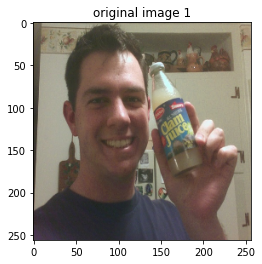

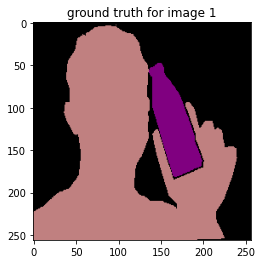

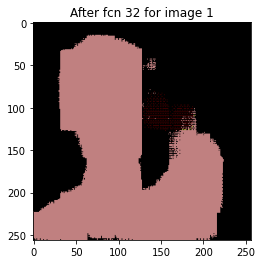

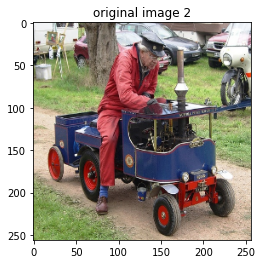

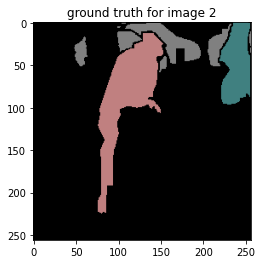

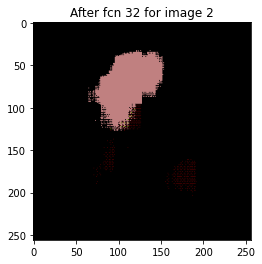

In [ ]:
#Model loaded and set to eval
model.load_state_dict(torch.load(PATHH))
model.eval()
# iterator for validation set and the model is tested
dataiter = iter(val_loader)
data = next(dataiter)
x_val , y_val = data

dis_real = x_val.numpy().astype(np.uint8)
# Displaying original image
plt.title('original image 1')
plt.imshow(dis_real[2]); plt.show()

# Rearranging the shape to (batch_size, Number of channels , Height , Width)
x_val = x_val.permute(0,3,1,2)
y_val = y_val.permute(0,3,1,2)

x_val = x_val.to(device)
y_val = y_val.to(device)
# Getting predictions
y_pred = model(x_val)

dis_y_val = (y_val).detach().cpu().numpy()
dis_y_pred = (y_pred).detach().cpu().numpy()

voc_array = np.array( VOC_COLORMAP )

rgb_truth = display_rgb( dis_y_val[2] ,voc_array ) 
plt.title('ground truth for image 1')
plt.imshow(rgb_truth); plt.show()

rgb_pred = display_rgb( dis_y_pred[2] ,voc_array ) 
plt.title('After fcn 32 for image 1')
plt.imshow(rgb_pred); plt.show()

# Displaying original image 2
plt.title('original image 2')
plt.imshow(dis_real[5]); plt.show()

rgb_truth_1 = display_rgb( dis_y_val[5] ,voc_array ) 
plt.title('ground truth for image 2')
plt.imshow(rgb_truth_1); plt.show()

rgb_pred_1 = display_rgb( dis_y_pred[5] ,voc_array ) 
plt.title('After fcn 32 for image 2')
plt.imshow(rgb_pred_1); plt.show()

## Write-up (5 pt)
* Describe the properties of segmentation model
* Describe the evaluation metric (IoU) for segmentation model 

### Answer
1)

 The model used in this assignment have an encoder and decoder part. VGG 16 pretrained model used for classification is used as backbone. The fully connected layers can be considered as convolution, thereby image of any shape can be inputed. 5 Deconvolutions are used to upsample ,as 5 maxpool layers were present in VGG16. No skip connections as it just an FCN32 architecture. Therefore, the output images with 21 classes is not as good as the ground truth as they are defined on coarse output. While fcn8 uses higher level features into consideration from previous layers and produces decent results. If there are multiple classes, the model seems to consider only the main class.


  2) 
  
  The Intersection Over Union for a given class is defined as the ratio of area of foreground pixels of predicted labels matching foreground pixels of truth labels to the combined area formed by foreground pixels of truth and predicted area. It can also be defined as :

  True Positive/ ( False Positive+ True Positive + False Negative).
  
   The value ranges between 0 and 1, where 0 means the predicted labels doesn't overlap with the ground truth and, 1 means both predicted and ground truth matches perfectly.

For multiple classes in segemetation, the average IoU between all the classes are computed.



## Hint
* Refer to original paper FCNet : https://arxiv.org/abs/1411.4038
* Figures for FCNet Structure: https://towardsdatascience.com/review-fcn-semantic-segmentation-eb8c9b50d2d1
* PyTorch Tutorial for Image semgnetation: https://towardsdatascience.com/train-neural-net-for-semantic-segmentation-with-pytorch-in-50-lines-of-code-830c71a6544f

# Part 4: Text2Img Generation (10 Points)

We have provided link to 'DALL.E' mini model to generate images from a text prompt in an interactive way.

https://colab.research.google.com/github/borisdayma/dalle-mini/blob/main/tools/inference/inference_pipeline.ipynb#scrollTo=118UKH5bWCGa

### Write-up (10 pts)
1. Try different prompts (as per your understanding) to reveal biases encoded by model (for example, birds always exist in the similar surroundings like trees).

2. By inputting creative text prompts, you should report the failure cases in your writeup i.e. when model doesn't quite understand the semantics of text prompt (for example, in case of long and complex sentences).

### Answer:
1. BIASES :
  * "parent feeding the child" - it only considered humans

  * 'Humans in circus' - it could only come up with performers in circus and not even a single spectator. Dalle gave outputs of gymanasts performing but most of it were puppets. 
  * "monkeys stealing bananas from dog" - it considers only 1 variant of monkeys almost always.
 

2. FAILURE: 
  * "a tiger chasing a deer while a photographer shoots them" - no photographer at all. and in some images there were more than 1 tiger or deer. And in some images it seemed like the deer was chasing the tiger.
  * 'waiting to cross the signal on a busy day' - It only gave pictures of traffic lights and some cars to show traffic. It wasn't able to understnad a person was waiting.
  * "batman fighting alien on the surface of moon" - Most of the pics showed moon in background(as another planet orbiting). And most others only showed batman.

### Extra Credit (15 pts)

In this part, you would compare the results of two recent text-to-image generation models: DALL E (https://www.craiyon.com) v/s Stable Diffusion (https://huggingface.co/spaces/stabilityai/stable-diffusion). 

1. You can compare the results of two models in terms of: image quality, diversity of background, grounding in the text prompt and so on.

2. Similar to the main write-up, you are required to report 2 biases and 2 failure cases: i) where these models are unfairly biased, and ii) cases where one model is able to rectify the mistakes (of not understanding the semantics of text prompt) made by other one.



Note: You shouldn't copy/past examples from internet, and any event of exact matching for any of the text prompts would be penalized.

### Answer :
1. Both gives high quality images(craiyon performs poorly on faces).Stable diffusion provides more grounding in text prompt. Diversity of background differed from case to case.
  * 'earth viewed from the space station' - both produced high resolution images. BUt Stable diffusion was more realistic and provided different views of earth.
  * 'a painting of a guy painting a painting' - quality wise stable diffusion way superior as it was able to create human faces properly. Diversity of background goes to craiyon, as stable diffusion was not that different from one another.

2. BIAS AND FAILURES
  * Bias 1 : " baby driving a vehicle "- Both models assumed the vehicle to be a car.And the babies were white in color(race).
  * Bias 2 : "doing household chores" - BOth assumed it was a women performing this task.
  * Failure 1 : "gorilla putting make up on an actress" - Craiyon was able to generate either gorilla or actress for a given picture.while SD outputted both in single image. BOth models were wrong in the understanding, in most of the photos the makeup was applied to the gorilla. 
  * Failure 2 :  "artist painting in orange while having a smoothie" - Craiyon mostly displayed an orange fruit, smoothie and an artist in the same image. But SD mostly showed the artist wearing orange dress and no smoothie, but was able to display an image which satisfied the text.